# Corporate Energy CONSUMPTION – Open Calgary

#### Team name      : Data Wave Warriors
#### Team members   :

## Introduction

Calgary has long been known as an energy city and is being recognized as a leader in the global energy transition. The weather in Calgary is slowly changing due to global warming. In 2021, for the first time in history, total electricity use hit a record high as a result of an increase in air conditioning use in the summer. Calgary typically peaks in energy use in winter, but that's likely to change now. When the temperature rises due to climate change, it is predicted that the use of energy for cooling will increase, which will result in more greenhouse gas emissions, which will lead to a vicious cycle of raising the temperature again. Currently, about 84% of greenhouse gases that cause climate change are generated in the process of using energy, so it is necessary to study where a lot of energy is generated in order to prevent climate warming. We aim to analyze and show energy use of facilities and infrastructure components on a monthly or yearly basis with an open dataset containing electricity, natural gas, solar power provided by the city.  

#### Calgary Tempurature fluctation for years

Temperature are given as a daily maximun, daily minimum and daily average. 
- Daily maximnum temperature is the hottest temperature in a day. 
- Daily minimun temperature is the coldest temperature in a day. 
- Daily avearage temperature is the average of the maxium temparature and minium temperature in a day

Before analyzing the energy consumption, let me explain the temperature change over the past 100 years.
The graph made through open data shows the average values of the hottest and coldest temperatures from 1948 to 2020 as shown below. Annual averages are also shown. The average annual temperature has risen by about 1.9 degrees. Based on the highest temperature per day in June, July, and August, the hottest months of the year, the difference in annual average values does not show much difference from 1948 to 2020. However, if you look at the difference in the average value every year based on the lowest temperature in one day, the temperature has risen since 2000. Also, looking at the graph comparing the lowest and highest average monthly temperatures for 2000, 2010, and 2020, the temperature in November and December in 2020 is about -4 degrees higher than in 2000 and 2010. In the case of July and August, the hot period is distributed for a long time.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import griddata
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
#from geopandas import GeoDataFrame
sns.set()

fields = ['date', 'max_temperature','min_temperature', 'avg_hourly_temperature', 'avg_temperature']
weatherdata = pd.read_csv("../dataset/weatherstats_calgary_daily.csv", skipinitialspace=True, usecols=fields)
#display(weatherdata)

#### Average annual temperature in Calgary from 1920 to 2021 ####


,mean
Year,
1948,3.002022
1949,3.305260
1950,1.305781
1951,1.228110
1952,3.873033
...,...
2016,6.176284
2017,5.149068
2018,4.332438


#### Average hottest temperature each day of June, July, and August from 1920 to 2021 ####


,mean
Year,
1948,22.357609
1949,22.807609
1950,21.171739
1951,18.640217
1952,20.080435
...,...
2016,22.372826
2017,24.752174
2018,23.576087


#### Average coldest temperature each day of Jan, Feb, and Mar from 1920 to 2021 ####


,mean
Year,
1948,-15.403297
1949,-20.331111
1950,-18.666667
1951,-17.180000
1952,-14.182418
...,...
2016,-10.210989
2017,-11.730000
2018,-12.768889


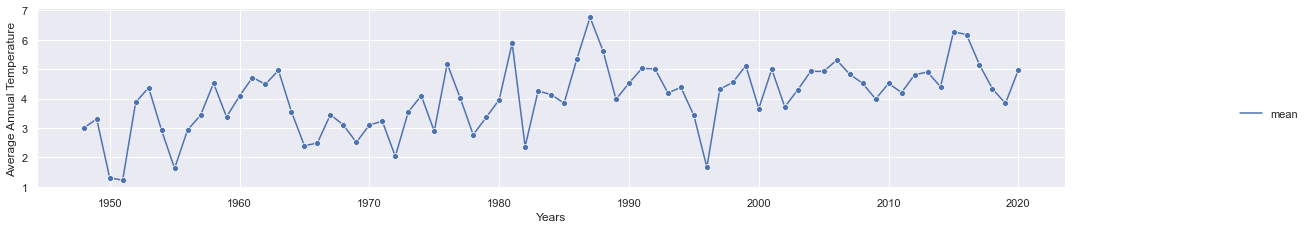

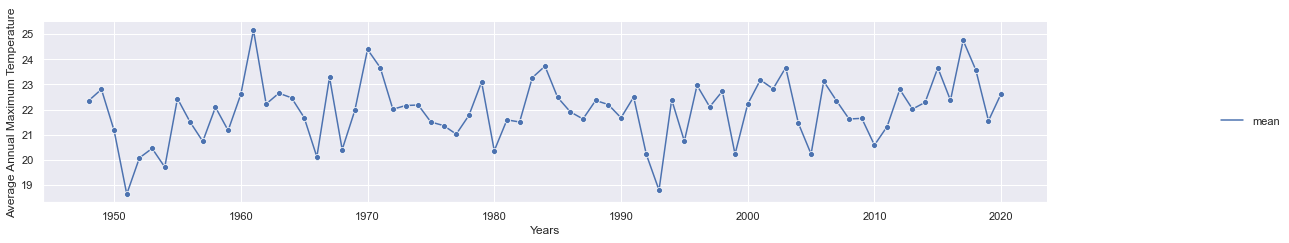

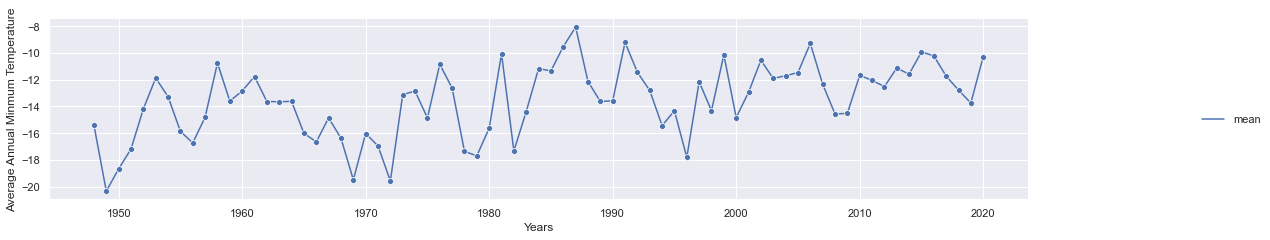

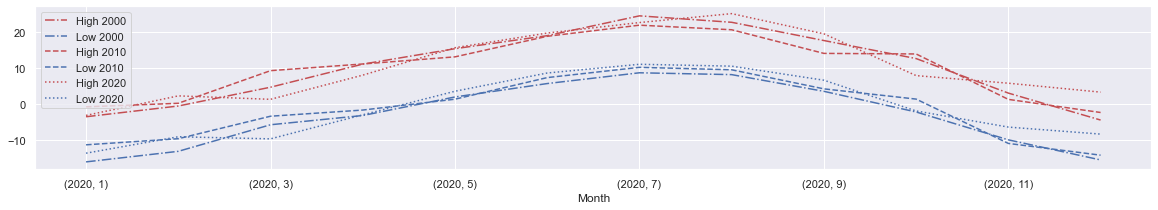

In [3]:
#tempData.head()
weatherdata.date=pd.to_datetime(weatherdata.date)

yseries = weatherdata['date'].dt.year
mseries = weatherdata['date'].dt.month
dseries = weatherdata['date'].dt.day

tempData = pd.DataFrame({'Date':weatherdata['date']
                         ,'Year': yseries
                         ,'Month': mseries 
                         ,'max_temperature':weatherdata['max_temperature']
                         ,'min_temperature':weatherdata['min_temperature']
                         ,'avg_hourly_temperature':weatherdata['avg_hourly_temperature']
                         ,'avg_temperature':weatherdata['avg_temperature']})

meanData=tempData[(tempData['Year'] >= 1948) & (tempData['Year'] <= 2020) ].groupby(['Year']).agg(mean = ('avg_temperature','mean'))
g=sns.relplot(kind='line', data=meanData, linestyle='-', marker='o', label="dd")
g.fig.set_size_inches(20,3)
g.set(xlabel='Years', ylabel='Average Annual Temperature')
print('#### Average annual temperature in Calgary from 1920 to 2021 ####')
display(meanData)

# calculate mean from November to March for each year
summerData=tempData[(tempData['Year'] >= 1948) & (tempData['Year'] <= 2020) & (tempData['Month'] <= 8) & (tempData['Month'] >= 6)]
summerMeanData=summerData.groupby(['Year']).agg(mean = ('max_temperature','mean'))
#summerMeanData.plot(kind='line',figsize=(20,3), marker='o')
g=sns.relplot(kind='line', data=summerMeanData, linestyle='-', marker='o', label="dd")
g.fig.set_size_inches(20,3)
g.set(xlabel='Years', ylabel='Average Annual Maximum Temperature')
print('#### Average hottest temperature each day of June, July, and August from 1920 to 2021 ####')
display(summerMeanData)

# calculate mean from December to Feb for each year
winterData=tempData[(tempData['Year'] >= 1948) & (tempData['Year'] <= 2020) & (tempData['Month'].isin([12,1,2]))]
winterMeanData=winterData.groupby(['Year']).agg(mean = ('min_temperature','mean'))
#winterMeanData.plot(kind='line',figsize=(20,3), marker='o').invert_yaxis()
g=sns.relplot(kind='line', data=winterMeanData, linestyle='-', marker='o', label="dd")
g.fig.set_size_inches(20,3)
g.set(xlabel='Years', ylabel='Average Annual Minmum Temperature')
print('#### Average coldest temperature each day of Jan, Feb, and Mar from 1920 to 2021 ####')
display(winterMeanData)

data1=tempData[(tempData['Year']==2000)]
#data1_mean=data1.groupby(['Year','Month']).agg(mean = ('avg_temperature','mean'))
data1_max_mean=data1.groupby(['Year','Month']).agg(mean = ('max_temperature','mean'))
data1_min_mean=data1.groupby(['Year','Month']).agg(mean = ('min_temperature','mean'))

data2=tempData[(tempData['Year']==2010)]
#data2_mean=data2.groupby(['Year','Month']).agg(mean = ('avg_temperature','mean'))
data2_max_mean=data2.groupby(['Year','Month']).agg(mean = ('max_temperature','mean'))
data2_min_mean=data2.groupby(['Year','Month']).agg(mean = ('min_temperature','mean'))

data3=tempData[(tempData['Year']==2020)]
#data3_mean=data3.groupby(['Year','Month']).agg(mean = ('avg_temperature','mean'))
data3_max_mean=data3.groupby(['Year','Month']).agg(mean = ('max_temperature','mean'))
data3_min_mean=data3.groupby(['Year','Month']).agg(mean = ('min_temperature','mean'))


fig, ax = plt.subplots()
months=['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
#data1_mean.plot(kind='line',figsize=(20,3),ax=ax, c='r', linestyle=':')
data1_max_mean.plot(kind='line',figsize=(20,3),ax=ax, c='r', linestyle='-.',label='2001')
data1_min_mean.plot(kind='line',figsize=(20,3),ax=ax, c='b', linestyle='-.')


#data2_mean.plot(kind='line',figsize=(20,3),ax=ax, c='r', linestyle=':')
data2_max_mean.plot(kind='line',figsize=(20,3),ax=ax, c='r', linestyle='--')
data2_min_mean.plot(kind='line',figsize=(20,3),ax=ax, c='b', linestyle='--')


#data3_mean.plot(kind='line',figsize=(20,3),ax=ax, c='r', linestyle=':')
data3_max_mean.plot(kind='line',figsize=(20,3),ax=ax, c='r', linestyle=':')
data3_min_mean.plot(kind='line',figsize=(20,3),ax=ax, c='b', linestyle=':')
ax.set_xlabel("Month")
plt.legend(["High 2000","Low 2000","High 2010","Low 2010","High 2020","Low 2020"])
plt.show()

## Guiding Questions

### 1. What is the recent trend of year-on-year energy consumption in the city?

Here the energy consumption data is calculated based on,
- Natural Gas
- Solar Power Energy
- Solar Thermal Energy

Also the units were first converted from kwh to GJ in order to observe statistics on the same unit of energy consumption. After data wrangling we found maximum consumption out of the above said three resources of energy and found that the Natural Gas is the highest source of fuel to produce energy.

In [3]:

energydata = pd.read_csv("../dataset/Corporate_Energy_Consumption.csv", thousands=',')

def func(x):
    if(x['Unit'] == 'kWh'):
        x['Total Consumption'] = pd.to_numeric(x['Total Consumption'])*0.0036
        x['Unit'] = 'GJ'
        return x
    else:
        return x

origin_energedata=energydata
energydata = energydata.apply(lambda x: func(x), axis=1)
# display(energydata)

energyResourcesData = energydata[(energydata['Energy Description'] != 'Electricity') & (energydata['Energy Description'] != 'District Energy')& (energydata['Total Consumption'] != 0.0)]

newData = energydata.groupby(['Energy Description', 'Year']).sum()


disEnergyData = newData.loc['District Energy']
electricityData = newData.loc['Electricity']
ngData = newData.loc['Natural Gas']
seData = newData.loc['Solar Power']
stData = newData.loc['Solar Thermal']


naturalGasConsumption = energyResourcesData[energyResourcesData['Energy Description']=='Natural Gas']
print("Maximum consumption of Natual gas to date in a year: ", naturalGasConsumption['Total Consumption'].max())
solarEnergyConsumption = energyResourcesData[energyResourcesData['Energy Description']=='Solar Power']
print("Maximum consumption of Solar power to date in a year: ", solarEnergyConsumption['Total Consumption'].max())
solarThermalConsumption = energyResourcesData[energyResourcesData['Energy Description']=='Solar Thermal']
print("Maximum consumption of Solar thermal power to date in a year: ", solarThermalConsumption['Total Consumption'].max())


Maximum consumption of Natual gas to date in a year:  44131.0
Maximum consumption of Solar power to date in a year:  2882.592
Maximum consumption of Solar thermal power to date in a year:  248.0


### Maximum consumption years

In [6]:
print("Maximum consumption of Natual gas is done in year: \n", naturalGasConsumption['Year'][naturalGasConsumption['Total Consumption']==44131.0])
print("Maximum consumption of Solar power energy is done in year: \n",solarEnergyConsumption['Year'][solarEnergyConsumption['Total Consumption']==2882.592])
print("Maximum consumption of Solar thermal energy is done in year: \n",solarThermalConsumption['Year'][solarThermalConsumption['Total Consumption']==248.0])

Maximum consumption of Natual gas is done in year: 
 131250    2021
Name: Year, dtype: int64
Maximum consumption of Solar power energy is done in year: 
 123096    2020
Name: Year, dtype: int64
Maximum consumption of Solar thermal energy is done in year: 
 105983    2014
Name: Year, dtype: int64


From the results we found that the maximum energy is consumed in the year 2021 is produced from Natural gas. This was also the highest ever energy consumption to date from this non-renewable resource. Furthermore we analysed that the maximum energy consumption from solar power was in 2020 at 2882.6 GJ while from solar thermal it was back in 2014 where the energy production stood at 248 GJ.

### Energy consumption using Natural Gas

In [7]:
display(naturalGasConsumption.reset_index())

,index,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
0,456,Calgary Growth Strategies,INACTIVE - EASTLAKE DEPOT,0003045011383,11195 42 ST SE,Natural Gas,2014,Jan,224.0,GJ
1,457,Calgary Growth Strategies,INACTIVE - EASTLAKE DEPOT,0003045011383,11195 42 ST SE,Natural Gas,2014,Feb,245.0,GJ
2,458,Calgary Growth Strategies,INACTIVE - EASTLAKE DEPOT,0003045011383,11195 42 ST SE,Natural Gas,2014,Mar,209.0,GJ
3,459,Calgary Growth Strategies,INACTIVE - EASTLAKE DEPOT,0003045011383,11195 42 ST SE,Natural Gas,2014,Apr,100.0,GJ
4,460,Calgary Growth Strategies,INACTIVE - EASTLAKE DEPOT,0003045011383,11195 42 ST SE,Natural Gas,2014,May,64.0,GJ
...,...,...,...,...,...,...,...,...,...,...
33468,161302,Water Services,VALLEYFIELD WASTEWATER RECEIVING STATION,0003025408748,2315 49 AV SE,Natural Gas,2021,Feb,54.0,GJ
33469,161303,Water Services,VALLEYFIELD WASTEWATER RECEIVING STATION,0003025408748,2315 49 AV SE,Natural Gas,2021,Mar,36.0,GJ
33470,161304,Water Services,VALLEYFIELD WASTEWATER RECEIVING STATION,0003025408748,2315 49 AV SE,Natural Gas,2021,Apr,25.0,GJ
33471,161305,Water Services,VALLEYFIELD WASTEWATER RECEIVING STATION,0003025408748,2315 49 AV SE,Natural Gas,2021,May,18.0,GJ


From the data obtained for the consumption of Natural Gas to produce energy we found that a total of 33472 different addresses having different facilities and business units are dependent on the non renewable resource to power there corporate offices in Calgary. Overall, there is a huge amount of reliability on Natural Gas.

### Energy consumption using Solar power

In [8]:
display(solarEnergyConsumption.reset_index())

,index,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
0,39515,Calgary Transit,CTRAIN STATION - 69TH STREET SW,CTRAIN STATION - 69 ST SW SOLAR,6999C 17 AV SW,Solar Power,2018,Jun,3.0384,GJ
1,39516,Calgary Transit,CTRAIN STATION - 69TH STREET SW,CTRAIN STATION - 69 ST SW SOLAR,6999C 17 AV SW,Solar Power,2018,Jul,17.1288,GJ
2,39517,Calgary Transit,CTRAIN STATION - 69TH STREET SW,CTRAIN STATION - 69 ST SW SOLAR,6999C 17 AV SW,Solar Power,2018,Aug,13.8276,GJ
3,39518,Calgary Transit,CTRAIN STATION - 69TH STREET SW,CTRAIN STATION - 69 ST SW SOLAR,6999C 17 AV SW,Solar Power,2018,Sep,8.9280,GJ
4,39519,Calgary Transit,CTRAIN STATION - 69TH STREET SW,CTRAIN STATION - 69 ST SW SOLAR,6999C 17 AV SW,Solar Power,2018,Oct,12.9420,GJ
...,...,...,...,...,...,...,...,...,...,...
1086,133602,Water Services,GLENMORE WATER TREATMENT PLANT - WB,GLENMORE WTP - SOLAR - EXPORTS,1646 56 AV SW,Solar Power,2021,Mar,-1.0152,GJ
1087,133603,Water Services,GLENMORE WATER TREATMENT PLANT - WB,GLENMORE WTP - SOLAR,1646 56 AV SW,Solar Power,2021,Apr,125.7444,GJ
1088,133604,Water Services,GLENMORE WATER TREATMENT PLANT - WB,GLENMORE WTP - SOLAR - EXPORTS,1646 56 AV SW,Solar Power,2021,Apr,-0.4176,GJ
1089,133605,Water Services,GLENMORE WATER TREATMENT PLANT - WB,GLENMORE WTP - SOLAR,1646 56 AV SW,Solar Power,2021,May,120.1608,GJ


From the data obtained for the consumption of Solar Power to produce energy we found that a total of 1090 different addresses having different facilities and business units are dependent on solar power to provide energy to there corporate offices in Calgary. Overall, this is not as huge in comparison to the amount of reliance we have on Natural Gas.

### Energy consumption using Solar thermal

In [9]:
display(solarThermalConsumption.reset_index())

,index,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
0,105977,Facility Management,SOUTHLAND LEISURE CENTRE,SLC - SOLAR THERMAL SYSTEM,2000 SOUTHLAND DR SW,Solar Thermal,2014,Jan,111.0,GJ
1,105978,Facility Management,SOUTHLAND LEISURE CENTRE,SLC - SOLAR THERMAL SYSTEM,2000 SOUTHLAND DR SW,Solar Thermal,2014,Feb,146.0,GJ
2,105979,Facility Management,SOUTHLAND LEISURE CENTRE,SLC - SOLAR THERMAL SYSTEM,2000 SOUTHLAND DR SW,Solar Thermal,2014,Mar,187.0,GJ
3,105980,Facility Management,SOUTHLAND LEISURE CENTRE,SLC - SOLAR THERMAL SYSTEM,2000 SOUTHLAND DR SW,Solar Thermal,2014,Apr,229.0,GJ
4,105981,Facility Management,SOUTHLAND LEISURE CENTRE,SLC - SOLAR THERMAL SYSTEM,2000 SOUTHLAND DR SW,Solar Thermal,2014,May,224.0,GJ
...,...,...,...,...,...,...,...,...,...,...
63,106040,Facility Management,SOUTHLAND LEISURE CENTRE,SLC - SOLAR THERMAL SYSTEM,2000 SOUTHLAND DR SW,Solar Thermal,2019,Apr,84.0,GJ
64,106041,Facility Management,SOUTHLAND LEISURE CENTRE,SLC - SOLAR THERMAL SYSTEM,2000 SOUTHLAND DR SW,Solar Thermal,2019,May,80.0,GJ
65,106042,Facility Management,SOUTHLAND LEISURE CENTRE,SLC - SOLAR THERMAL SYSTEM,2000 SOUTHLAND DR SW,Solar Thermal,2019,Jun,17.0,GJ
66,106043,Facility Management,SOUTHLAND LEISURE CENTRE,SLC - SOLAR THERMAL SYSTEM,2000 SOUTHLAND DR SW,Solar Thermal,2019,Jul,1.0,GJ


From the data obtained for the consumption of Solar Thermal Energy to produce energy we found that a total of only 67 different addresses with business unit naming Facility Management are soley dependent on solar thermal power to provide energy to there corporate offices in Calgary. Overall, this is not anywhere near to the amount of reliance we have on Natural Gas or Solar Power.

### Line plot to compare Total Energy Consumption using,
##### - Natural Gas
##### - Solar power
##### - Solar thermal energy

In [10]:
solarEnergyConsumption_2021 = solarEnergyConsumption[solarEnergyConsumption['Year']==2021]['Total Consumption'].sum(axis = 0, skipna = True)
solarEnergyConsumption_2020 = solarEnergyConsumption[solarEnergyConsumption['Year']==2020]['Total Consumption'].sum(axis = 0, skipna = True)
print("Relative energy sonsumption from solar power in 2021 w.r.t. 2020=", round(solarEnergyConsumption_2021/solarEnergyConsumption_2020, 2))


Relative energy sonsumption from solar power in 2021 w.r.t. 2020= 0.53


#### Assumption

More then half of the energy consumed in 2020 from solar power has been consumed already in 2021 till the month of August. Hence we might assume that till the end of 2021 it could cross 2020's energy consumption.

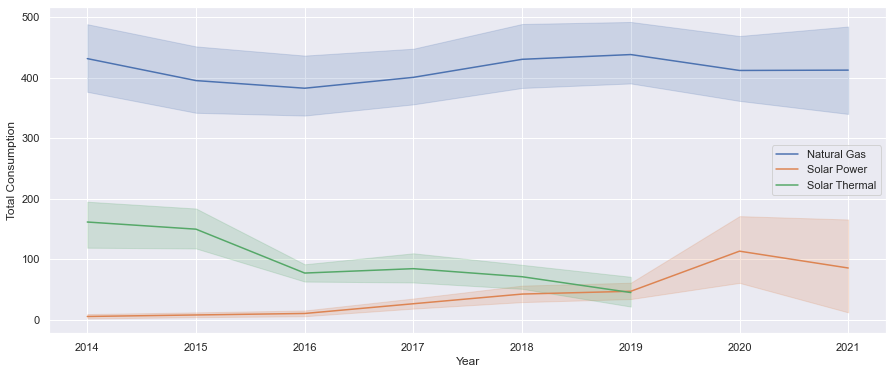

In [11]:
fig = plt.figure()
fig.set_size_inches(15,6)

ngDataPlot = sns.lineplot(data=naturalGasConsumption, x="Year", y="Total Consumption")
seDataPlot = sns.lineplot(data=solarEnergyConsumption, x="Year", y="Total Consumption")
stDataPlot = sns.lineplot(data=solarThermalConsumption, x="Year", y="Total Consumption")

legend = plt.legend(labels=["Natural Gas","Solar Power", "Solar Thermal"], loc='center right')

## Year-on-year energy consumption in Calgary

From the line plot we can clearly understand the dependency of energy produced from Natural gas for the city of Calgary. Here the graph shown depicts the mean value(bold line) over the years with a confidence interval(shaded area) of 95% over the years 2014 to 2021. This plot gives us a better idea on the mean energy consumption with the total accuracy of 95% for each the the resource and the total energy consumed.

Here the mean production of energy from natural gas is almost constant. The mean production of energy from solar power has seen a growth over the years from 2014 to 2020, while there is a decline for the year 2021 but it might be due to non-availability of full data yet for the year 2021. Hence overall we can conclude that the total energy produced from solar power is increasing each year. But the same can not be said for the energy produced from solar thermal. Over the years from 2014 to 2019 there is a downward trend for the energy consumption from this resource. While we do not have any data available for the year 2020 and 2021.

We can also assume that since 2019 energy consumption from solar power saw the highest growth because of the highest slope seen in the line plot and the same trend could repeat by the end of 2021 if our assumption made above are correct.

### Pair Plot for Natural Gas

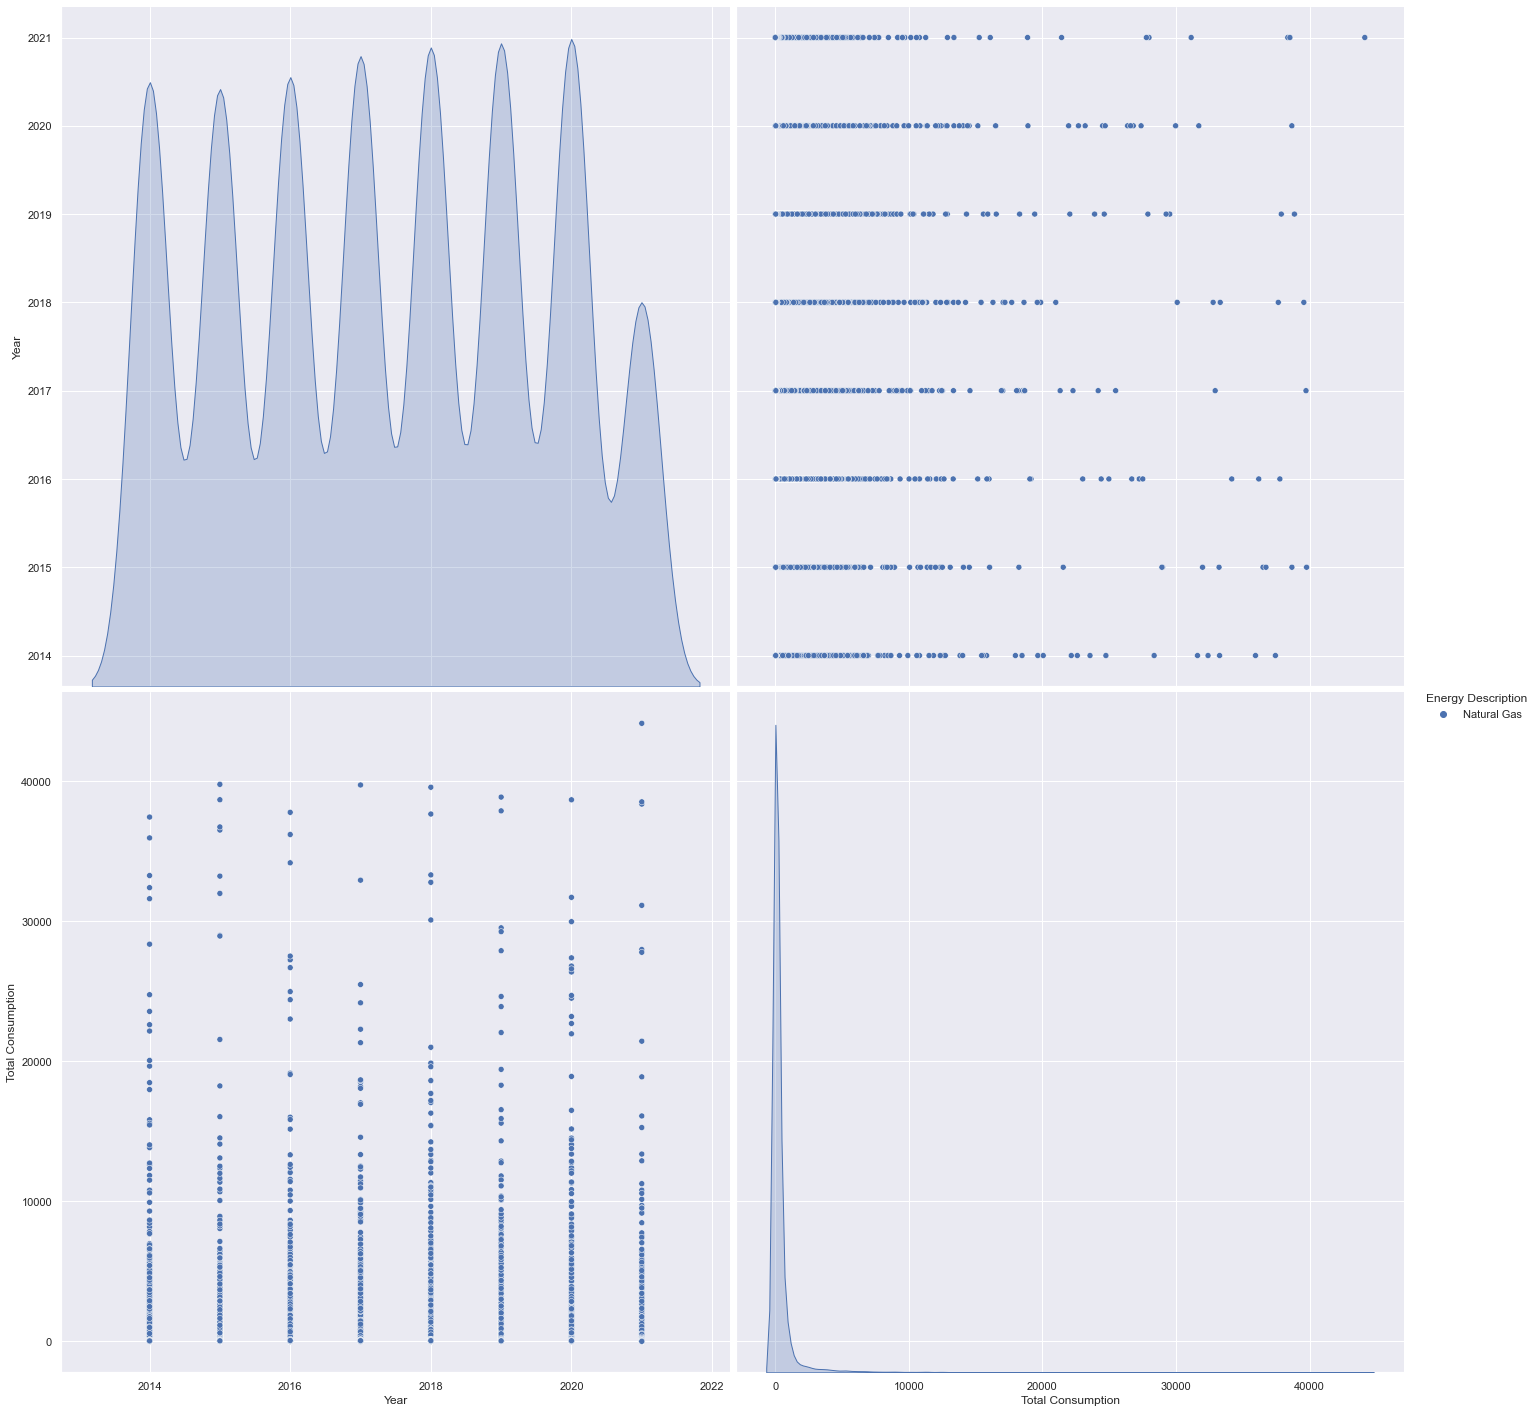

In [12]:
plots = sns.pairplot(naturalGasConsumption, hue='Energy Description', height=10);

### Pair Plot for Solar Power

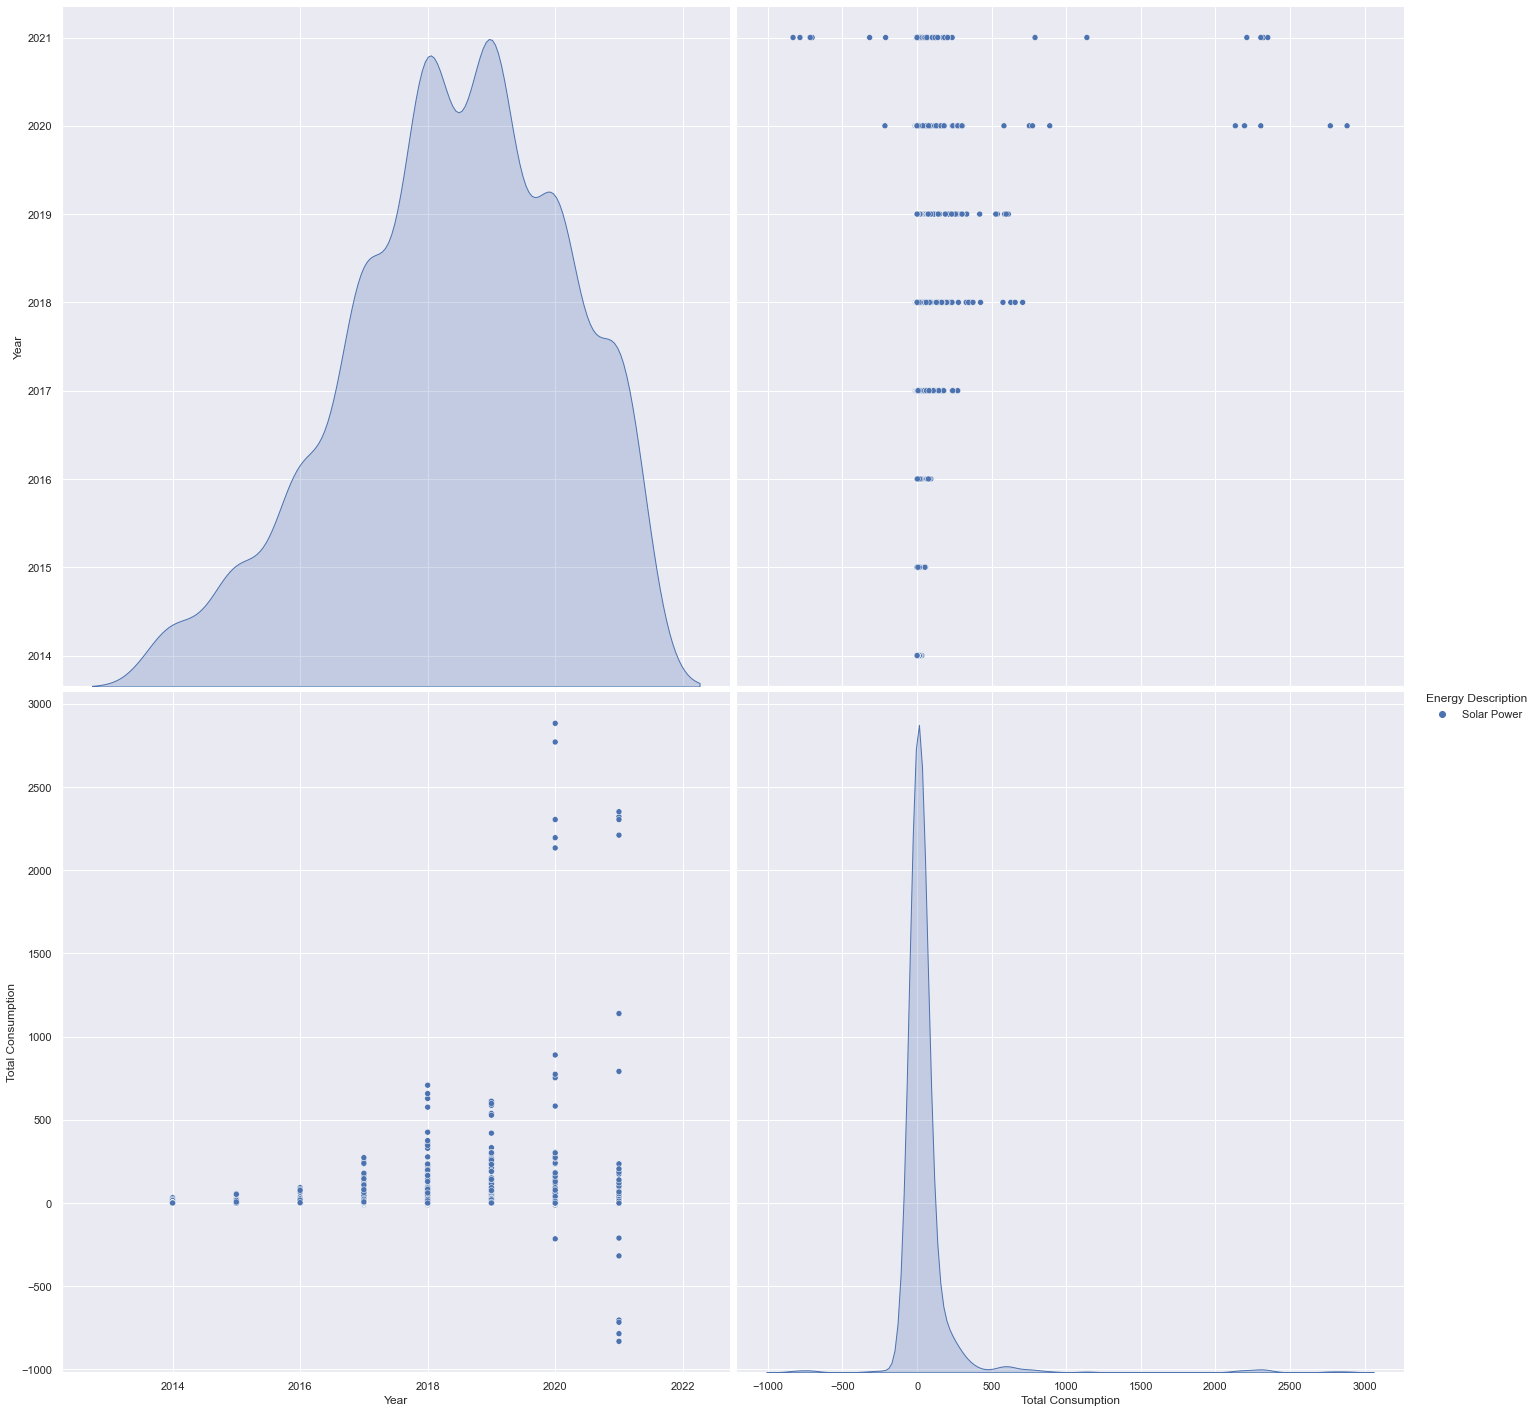

In [13]:
plots = sns.pairplot(solarEnergyConsumption, hue='Energy Description', height=10);

### Pair Plot for Solar Thermal Energy

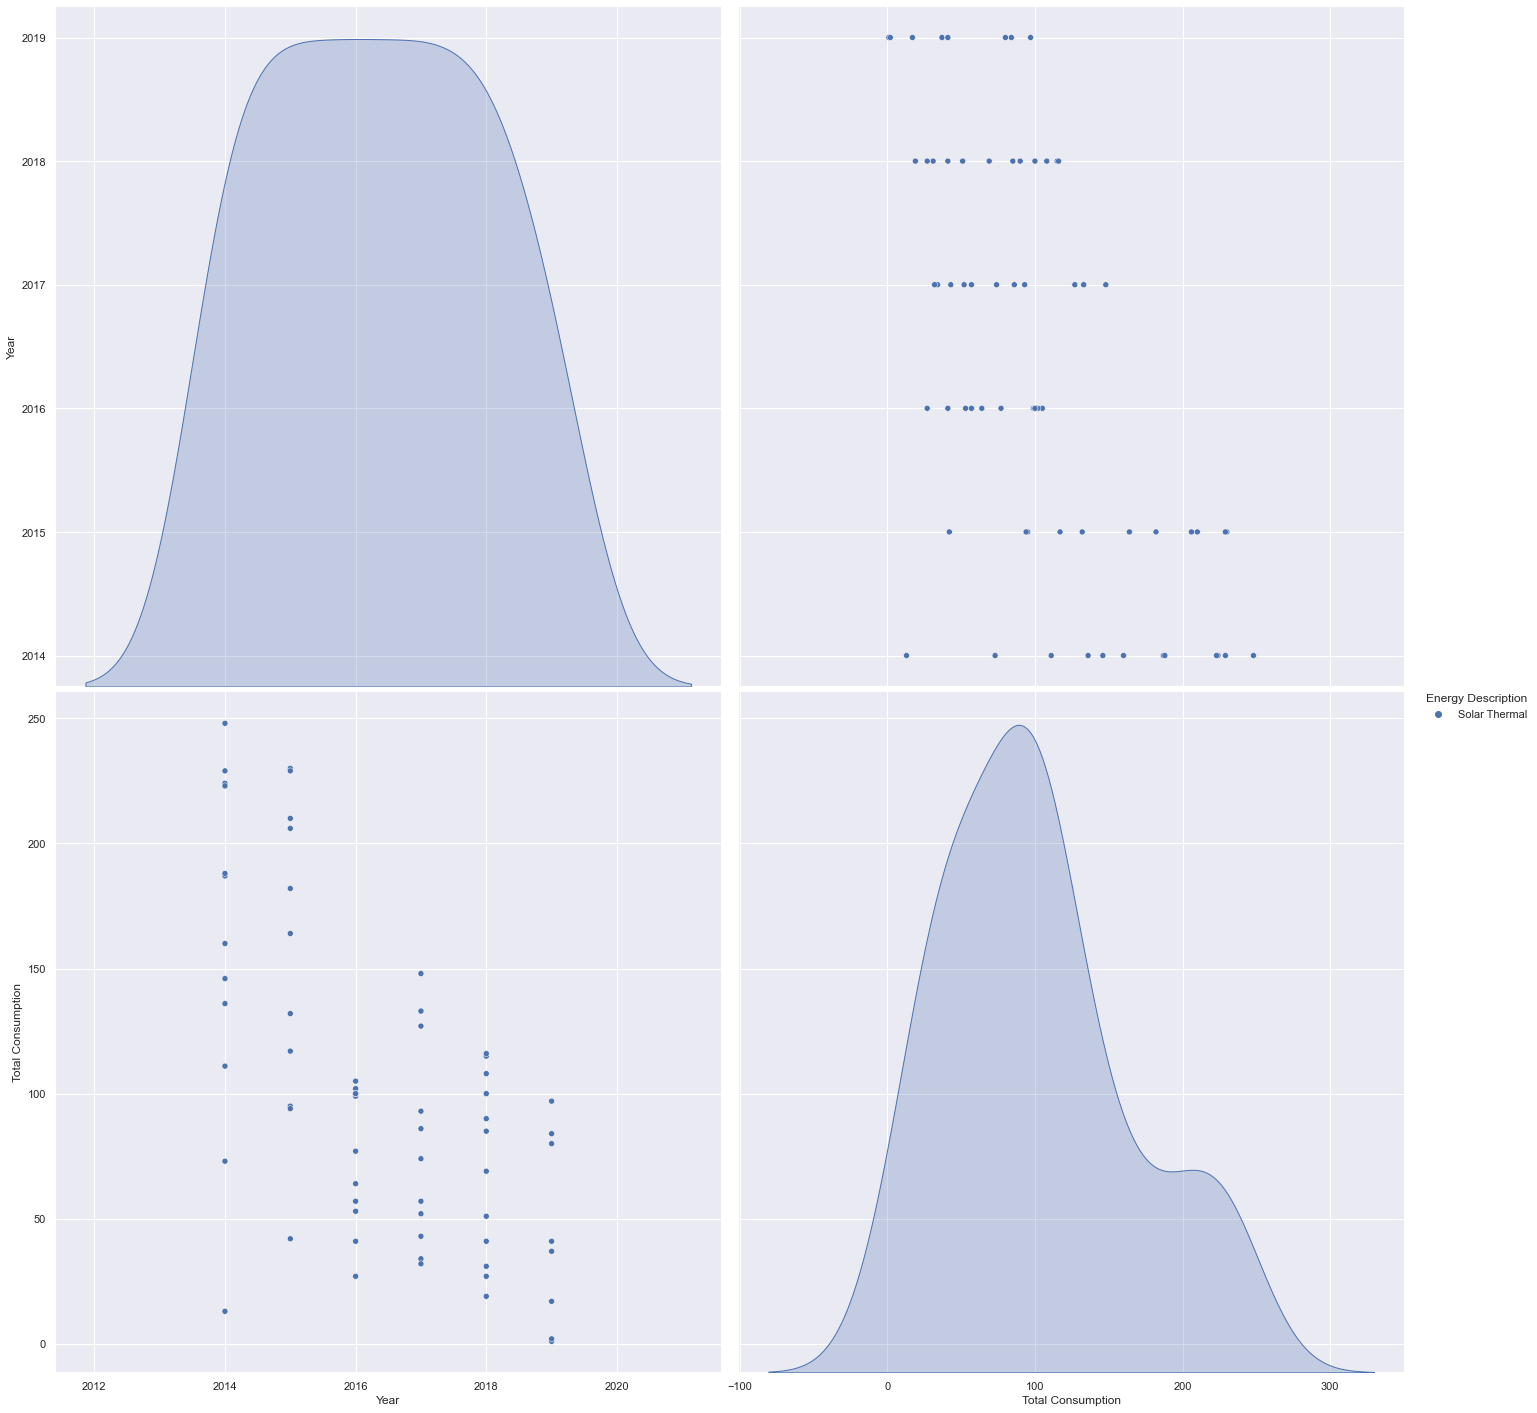

In [6]:
plots = sns.pairplot(solarThermalConsumption, hue='Energy Description', height=10);

### Total consumption of Natural gas year-on-year 

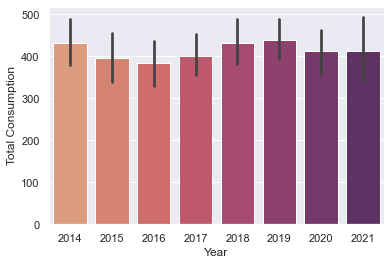

In [24]:
plot = sns.barplot(data=naturalGasConsumption, x="Year", y="Total Consumption", palette="flare")

### Total consumption of Solar Power year-on-year 

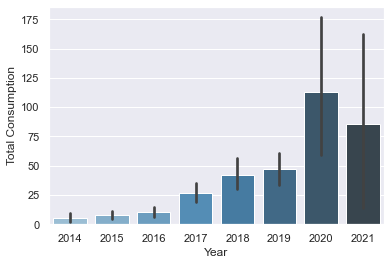

In [8]:
plot = sns.barplot(data=solarEnergyConsumption, x="Year", y="Total Consumption", palette="Blues_d")

### Total consumption of Solar Thermal Energy year-on-year 

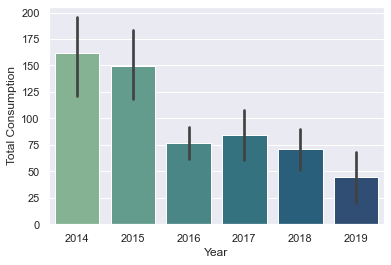

In [26]:
plot = sns.barplot(data=solarThermalConsumption, x="Year", y="Total Consumption", palette="crest")

### 2. What’s the distribution of the energy production i.e., how much energy is being produced from renewable resources like solar and non-renewable resources like natural gas?

We can know how much energy is produced based on the energy consumption rate. Let's look at renewable energy and non-renewable energy separately in the given data set. And since electricity is provided to Alberta and produced using non-renewable energy, electricity will be included in the non-renewable energy category.

### Renewable Energy vs Non-Renewable Energy

If you look at the graph below, you can see that the production of non-renewable energy has been decreasing since 2019. In the case of 2021, data is only available until July, so there seems to be a lot of difference between 2020 and 2021. Renewable energy production has grown steadily every year as of 2016, and nearly doubled in 2019 and 2020. In the case of 2021, there seems to be a lot of difference from 2020 because there is only data until July. However, when compared with the previous year, in the case of 2021, it seems that the production will be similar to that of 2020.

In [6]:

non_renewable_energy= energydata[(energydata['Energy Description'] == 'Natural Gas')].groupby(['Year']).sum()
renewable_energy= energydata[(energydata['Energy Description'] == 'Solar Power') | (energydata['Energy Description'] == 'Solar Thermal')].groupby(['Year']).sum()

print("===== Non Renewable Energy (Electricity & Natural Gas) ========")
display(non_renewable_energy)
print("===== Renewable Energy (Solar Power & Solar Thermal)  ========")
display(renewable_energy)

years=['2014','2015','2016','2017','2018','2019','2020','2021']
fig = px.bar(non_renewable_energy, x=years, y='Total Consumption')
fig.update_layout(
    title="Energy produced from non renewable resources",
    xaxis_title="Years",
    yaxis_title="Total Non Renewable Consumption",
    font=dict(
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

fig = px.bar(renewable_energy, x=years, y='Total Consumption')
fig.update_layout(
    title="Energy produced from renewable resources",
    xaxis_title="Years",
    yaxis_title="Total Renewable Consumption",
    font=dict(
        size=15,
        color="#7f7f7f"
    )
)
fig.show()



===== Non Renewable Energy (Electricity & Natural Gas) ========


,Total Consumption
Year,
2014,1838556.0
2015,1662432.0
2016,1641438.0
2017,1778015.0
2018,1936503.0
2019,1984580.0
2020,1879193.0
2021,1116475.0


===== Renewable Energy (Solar Power & Solar Thermal)  ========


,Total Consumption
Year,
2014,2059.1508
2015,2137.5248
2016,1743.1540
2017,5094.7528
2018,10884.8364
2019,11766.6296
2020,20505.6720
2021,10937.8764


#### Top 10 Business Units using Non Renewable Energy or Renewable Energy

We can also see how much energy is produced by comparing business units that consume renewable and non-renewable energy. The following tables and graphs analyzes the top 10 business units that consume non-renewable energy and the top 10 businesses that consume or produce renewable energy.

In [15]:
non_renewable_energy= energydata[(energydata['Energy Description'] == 'Natural Gas') | (energydata['Energy Description'] == 'Electricity')]
renewable_energy= energydata[(energydata['Energy Description'] == 'Solar Power') | (energydata['Energy Description'] == 'Solar Thermal')]
# Top 10 Facilities using Non renewable energy
grouped_non_renewable_bizunit=non_renewable_energy.groupby('Business Unit Desc').sum().sort_values('Total Consumption', ascending=[False]).head(10)
display(grouped_non_renewable_bizunit)
# Top 10 Facilities using renewable energy
grouped_renewable_bizunit=renewable_energy.groupby('Business Unit Desc').sum().sort_values('Total Consumption', ascending=[False]).head(10)
display(grouped_renewable_bizunit)

fig = px.bar(grouped_non_renewable_bizunit, x='Business Unit Desc', y='Total Consumption')
fig.update_layout(
    title="Energy produced from non renewable resources",
    xaxis_title="Years",
    yaxis_title="Total Non Renewable Consumption",
    font=dict(
        size=15,
        color="#7f7f7f"
    )
)
fig.show()

,Year,Total Consumption
Business Unit Desc,,
Water Services,64102486,7.995738e+06
Calgary Transit,56639309,6.564794e+06
Facility Management,80915899,5.980060e+06
Roads,6746336,2.332298e+06
CPS - Bureaus,9836411,1.226935e+06
Waste - Recycling Services,10726209,8.324841e+05
Calgary Parking Auth,6265716,5.169889e+05
Real Estate and Dev Serv,8285943,4.329342e+05
Calgary Parks,62534570,2.343974e+05


,Year,Total Consumption
Business Unit Desc,,
Waste - Recycling Services,86842,31148.6652
Facility Management,1947468,21643.6272
Water Services,238243,11962.2672
Calgary Transit,111019,375.0372
Corp Analytics and Innovation,8080,0.0000


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Year', 'Total Consumption'] but received: Business Unit Desc

### 3. In the end we will sum up different corporates and facilities energy consumption trends over the year and what’s their main source of resource of energy?

Alberta has energy resources including crude oil & gas, coal, renewable energy, natural gas, and more, so
we calculated that what is the main source of resource of energy in each primary Facility in City of Calgary base on 3 main primary energies which are Electricity, Natural Gas, and Solar Power.
As we mention that,  the units were first converted from kWh to GJ in order to observe statistics on the same unit of energy consumption.

In [16]:

for col in origin_energedata.columns:
    print(col + ": " + str(origin_energedata[col].dtype))

energydata = origin_energedata.apply(lambda x: func(x), axis=1)

Business Unit Desc: object
FacilityName: object
Site ID: object
FacilityAddress: object
Energy Description: object
Year: int64
Month: object
Total Consumption: int64
Unit: object


### Electricity Yearly Usage of each primary facility 

Year,2014,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,,
BEARSPAW WATER TREATMENT PLANT,27006979.0,22896652.0,34507602.0,37570393.0,34437203.0,27503120.0,34585362.0,16780991.0
BONNYBROOK WASTEWATER TREATMENT PLANT,25946479.0,18470960.0,18919634.0,24187268.0,30532643.0,28814674.0,26283641.0,16449813.0
CALGARY STREET LIGHTING,91870809.0,90922781.0,78855156.0,54751112.0,48574753.0,45044868.0,42802879.0,22300784.0
FISH CREEK WASTEWATER TREATMENT PLANT,NaN,NaN,12013694.0,7911196.0,12455848.0,8647091.0,13740451.0,6358564.0
GLENMORE WATER TREATMENT PLANT - WB,20752623.0,19647504.0,18619313.0,20468133.0,19762821.0,20062555.0,18482865.0,12184132.0
MUNICIPAL COMPLEX,1151483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PINE CREEK WASTEWATER TREATMENT PLANT,21972952.0,23077646.0,21265638.0,21626015.0,21776522.0,23153347.0,23486956.0,13634863.0
SH - BLDG W (COMPOST FACILITY),NaN,NaN,NaN,3613911.0,14359899.0,10817489.0,NaN,2104556.0


<Figure size 259200x259200 with 0 Axes>

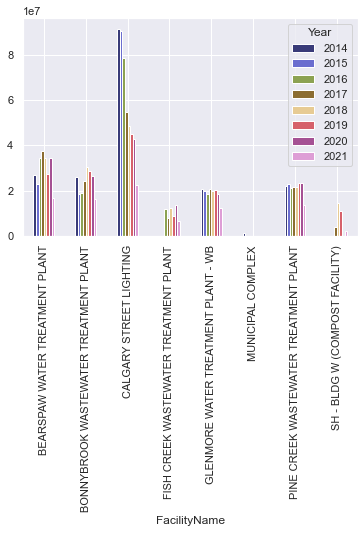

Year,2014,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,,
BONNYBROOK WASTEWATER TREATMENT PLANT,330634.0,330946.0,301646.0,222472.0,297477.0,239497.0,324569.0,229350.0
BUS MAINTENANCE GARAGE - ANDERSON GARAGE,60583.0,36873.0,28061.0,60976.0,65357.0,65526.0,37648.0,13376.0
BUS MAINTENANCE GARAGE - SPRING GARDENS,84489.0,74310.0,90538.0,115916.0,107267.0,97391.0,89211.0,44954.0
BUS MAINTENANCE GARAGE - VICTORIA PARK,35680.0,46058.0,23843.0,23466.0,34771.0,33255.0,21858.0,11263.0
MANCHESTER ASPHALT PLANT,NaN,10875.0,21257.0,NaN,NaN,NaN,NaN,NaN
OLIVER BOWEN MAINTENANCE FACILITY,14030.0,NaN,10468.0,NaN,12024.0,12755.0,NaN,NaN
STONEY TRANSIT FACILITY,NaN,NaN,NaN,NaN,NaN,11107.0,90547.0,49701.0
VILLAGE SQUARE LEISURE CENTRE,NaN,NaN,10017.0,10098.0,43570.0,30835.0,11377.0,NaN


<Figure size 259200x259200 with 0 Axes>

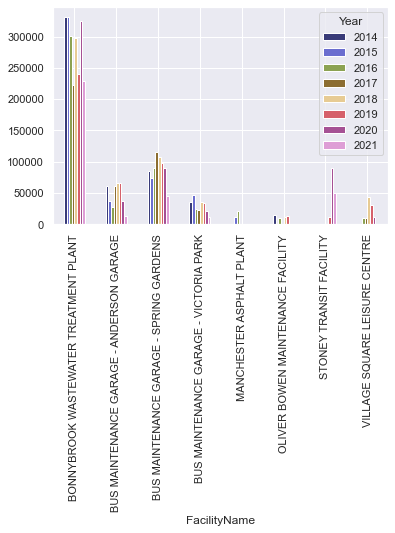

Year,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,
BEARSPAW WATER TREATMENT PLANT,NaN,NaN,NaN,672336.0,645145.0,528338.0,250570.0
CORPORATE WAREHOUSE,NaN,NaN,116749.0,88286.0,78731.0,100201.0,70950.0
GLENMORE WATER TREATMENT PLANT - WB,NaN,NaN,286548.0,232262.0,257429.0,234197.0,135341.0
SH - BLDG W (COMPOST FACILITY),NaN,NaN,NaN,1052172.0,1316807.0,4245700.0,3088045.0
SOUTHLAND LEISURE CENTRE,29977.0,131036.0,156458.0,124332.0,146456.0,121517.0,80792.0
WHITEHORN MULTI SERVICE CENTRE,NaN,NaN,459307.0,365949.0,406581.0,303593.0,223384.0


<Figure size 259200x259200 with 0 Axes>

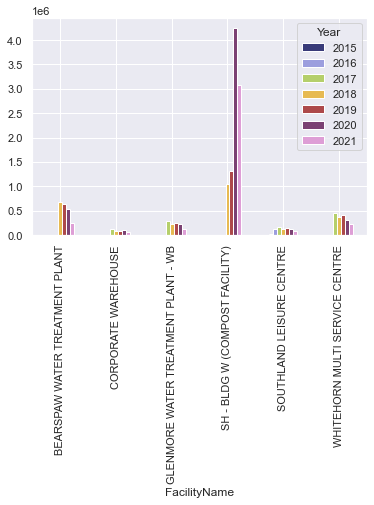

In [5]:
df = pd.DataFrame(origin_energedata,columns=["Business Unit Desc","FacilityName","Site ID", "FacilityAddress","Energy Description",
                                 "Year","Month","Total Consumption","Unit"])
df1=pd.DataFrame.drop(origin_energedata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df1 = df1.loc[df1['Energy Description'] == 'Electricity']
df1=df1.loc[df1['Total Consumption'] > 1000000]
df1=df1.loc[df1['Year'].between(2014,2021)]
df1.name = "Electricity Usage of each Year "
df1=df1.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)
display(df1)

fig = plt.figure()
df1.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()

df2=pd.DataFrame.drop(origin_energedata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df2= df2.loc[df2['Energy Description'] == 'Natural Gas']
df2 =df2.loc[df2['Total Consumption'] > 10000]
df2 =df2.loc[df2['Year'].between(2014,2021)]
df2.name = "Natual Gas Usage of each Year "
df2=df2.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)
display(df2)

fig = plt.figure()
df2.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()


df3=pd.DataFrame.drop(origin_energedata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df3 = df3.loc[df3['Energy Description'] == 'Solar Power']
df3=df3.loc[df3['Total Consumption'] > 10000]
df3=df3.loc[df3['Year'].between(2014,2021)]
df3.name = "Solar Power Usage of each Year "
df3=df3.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)

display(df3)

fig = plt.figure()
df3.plot(kind='bar', colormap='tab20b', grid=True)
fig.set_size_inches(3600,3600)
plt.show()


fig = px.scatter(df1, x=df1.columns, title = 'Electricity Yearly Usage of each primary facility ')
fig.show()


From the data shows that all of the primary facilities in Calgary have decreased use the electricity from 2014 to 2021. 
BEARSPAW WATER TREATMENT PLANT and  INE CREEK WASTEWATER TREATMENT PLANT were increased the using the electricity from 2015 to 2016 but they were cut down the usage of electricity after 2016.
Base on the violin plot, we realized that the most usage electricity facility is the Calgary Street Lighting and lowest is MUNICIPAL COMPLEX.

### Natural Gas Yearly Usage of each primary facility

Year,2014,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,,
BONNYBROOK WASTEWATER TREATMENT PLANT,330634.0,330946.0,301646.0,222472.0,297477.0,239497.0,324569.0,229350.0
BUS MAINTENANCE GARAGE - ANDERSON GARAGE,60583.0,36873.0,28061.0,60976.0,65357.0,65526.0,37648.0,13376.0
BUS MAINTENANCE GARAGE - SPRING GARDENS,84489.0,74310.0,90538.0,115916.0,107267.0,97391.0,89211.0,44954.0
BUS MAINTENANCE GARAGE - VICTORIA PARK,35680.0,46058.0,23843.0,23466.0,34771.0,33255.0,21858.0,11263.0
MANCHESTER ASPHALT PLANT,NaN,10875.0,21257.0,NaN,NaN,NaN,NaN,NaN
OLIVER BOWEN MAINTENANCE FACILITY,14030.0,NaN,10468.0,NaN,12024.0,12755.0,NaN,NaN
STONEY TRANSIT FACILITY,NaN,NaN,NaN,NaN,NaN,11107.0,90547.0,49701.0
VILLAGE SQUARE LEISURE CENTRE,NaN,NaN,10017.0,10098.0,43570.0,30835.0,11377.0,NaN


<Figure size 259200x259200 with 0 Axes>

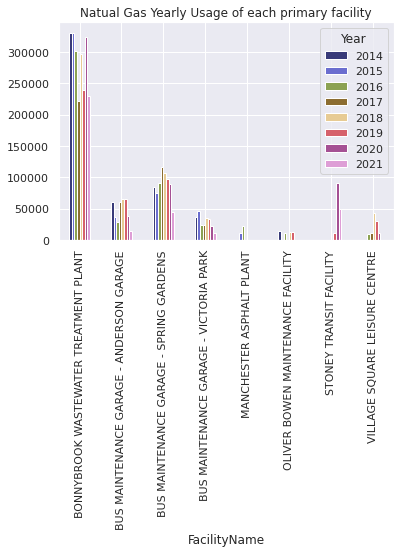

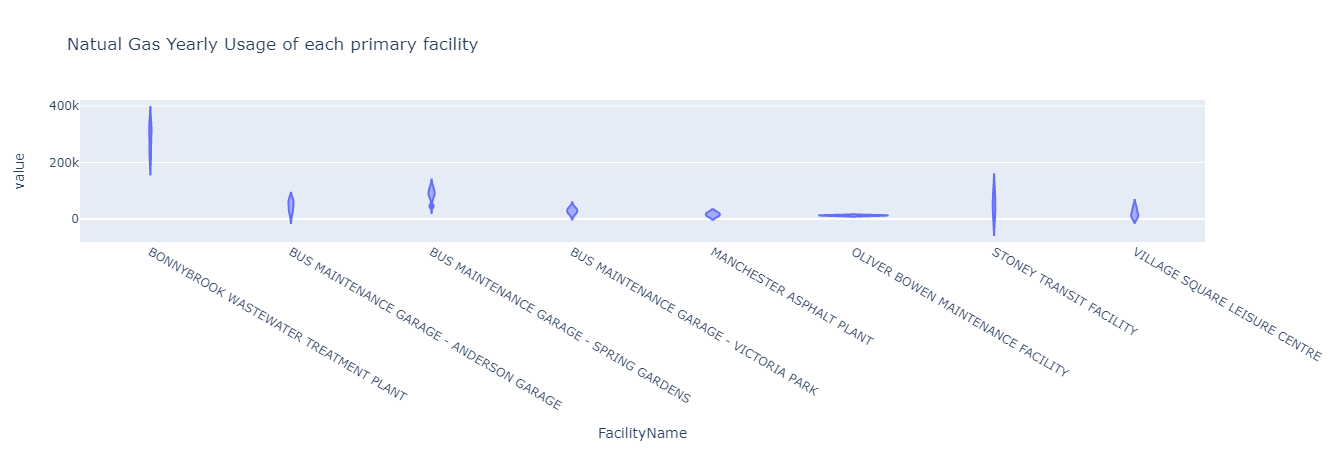

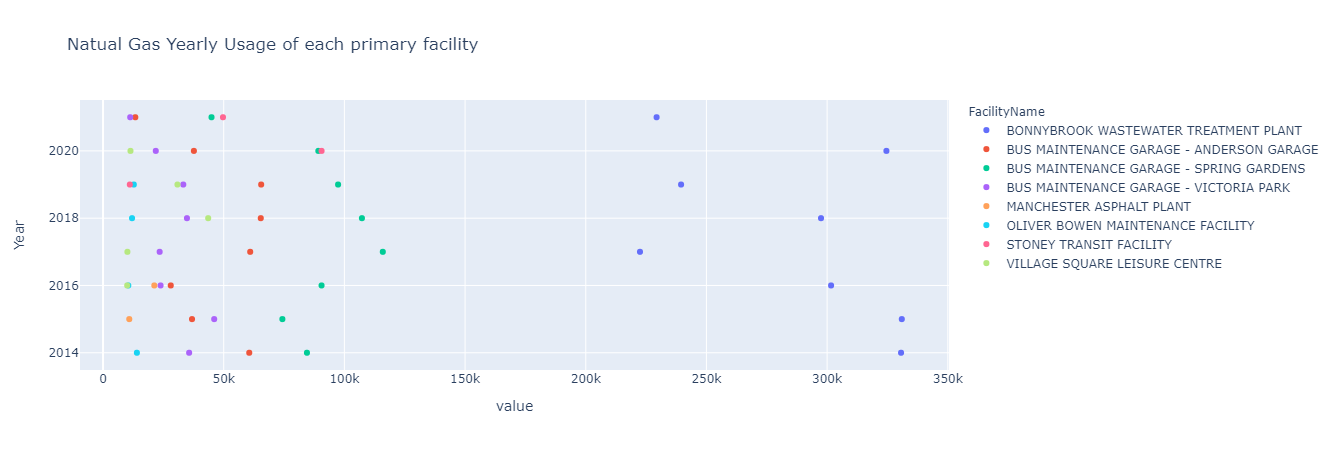

In [125]:
df2=pd.DataFrame.drop(origin_energedata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df2= df2.loc[df2['Energy Description'] == 'Natural Gas']
df2 =df2.loc[df2['Total Consumption'] > 10000]
df2 =df2.loc[df2['Year'].between(2014,2021)]
df2.name = "Natual Gas Yearly Usage of each facility "
df2=df2.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)
display(df2)

fig = plt.figure()
df2.plot(kind='bar', colormap='tab20b', grid=True, title = 'Natual Gas Yearly Usage of each primary facility')
fig.set_size_inches(3600,3600)
plt.show()

df2=pd.DataFrame.drop(origin_energedata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df2= df2.loc[df2['Energy Description'] == 'Natural Gas']
df2 =df2.loc[df2['Total Consumption'] > 10000]
df2 =df2.loc[df2['Year'].between(2014,2021)]
df2.name = "Natual Gas Usage of each Year "
df2=df2.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)

fig = px.violin(df2, y=df2.columns, title ='Natual Gas Yearly Usage of each primary facility ')
fig.show()
fig = px.scatter(df2, x=df2.columns, title ='Natual Gas Yearly Usage of each primary facility ')
fig.show()

From the data shows that all of the primary facilities in Calgary have decreased use the Natural Gas from 2014 to 2021. 
Most primay facilities were increased the using the Natural Gas in 2018 but they were cut down the usage of Natural Gas after 2018.
Base on the violin plot, we realized that the most usage Natural Gas facility is the BONNYBROOK WASTEWATER TREATMENT PLANT and lowest is OLIVER BOWEN MAINTENANCE FACILITY.

### Solar Power Yearly Usage of each primary facility

Year,2015,2016,2017,2018,2019,2020,2021
FacilityName,,,,,,,
BEARSPAW WATER TREATMENT PLANT,NaN,NaN,NaN,672336.0,645145.0,528338.0,250570.0
CORPORATE WAREHOUSE,NaN,NaN,116749.0,88286.0,78731.0,100201.0,70950.0
GLENMORE WATER TREATMENT PLANT - WB,NaN,NaN,286548.0,232262.0,257429.0,234197.0,135341.0
SH - BLDG W (COMPOST FACILITY),NaN,NaN,NaN,1052172.0,1316807.0,4245700.0,3088045.0
SOUTHLAND LEISURE CENTRE,29977.0,131036.0,156458.0,124332.0,146456.0,121517.0,80792.0
WHITEHORN MULTI SERVICE CENTRE,NaN,NaN,459307.0,365949.0,406581.0,303593.0,223384.0


<Figure size 259200x259200 with 0 Axes>

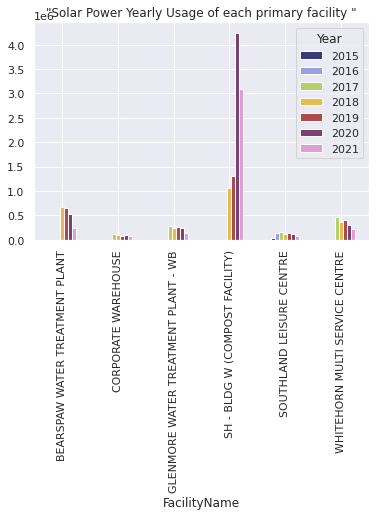

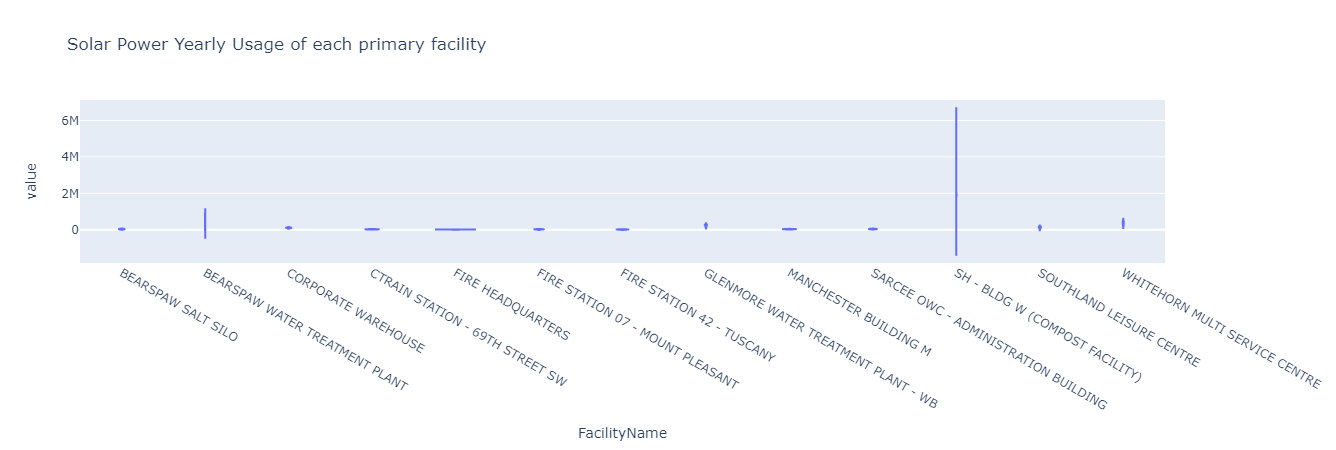

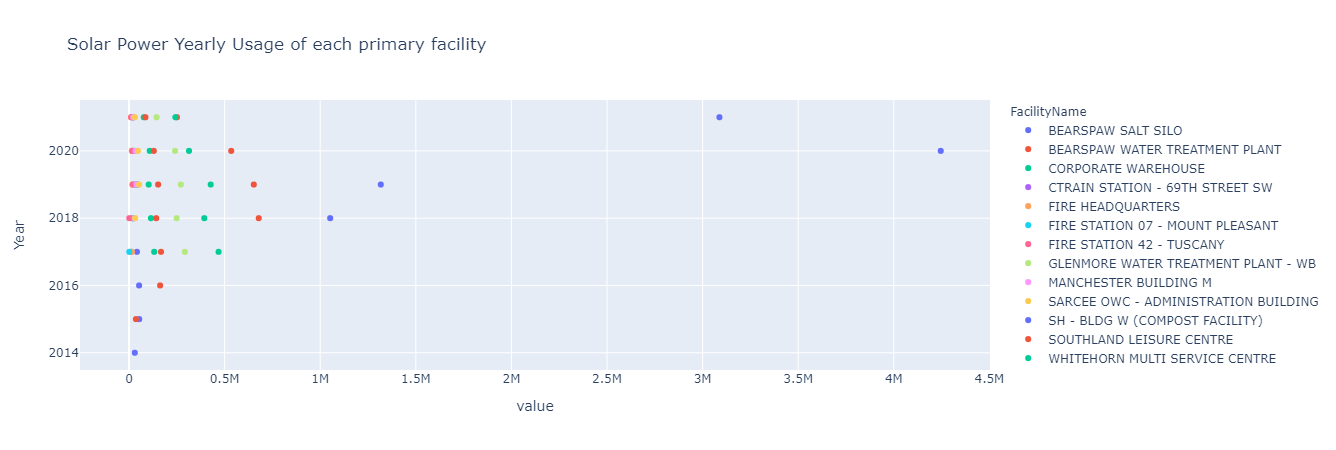

In [127]:
df3=pd.DataFrame.drop(origin_energedata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df3 = df3.loc[df3['Energy Description'] == 'Solar Power']
df3=df3.loc[df3['Total Consumption'] > 10000]
df3=df3.loc[df3['Year'].between(2014,2021)]
df3.name = "Solar Power Yearly Usage of each facility "
df3=df3.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=1)
display(df3)


fig = plt.figure()
df3.plot(kind='bar', colormap='tab20b', grid=True, title ='"Solar Power Yearly Usage of each primary facility "')
fig.set_size_inches(3600,3600)
plt.show()

df3=pd.DataFrame.drop(origin_energedata,["Business Unit Desc","Site ID","FacilityAddress"], axis=1)
df3 = df3.loc[df3['Energy Description'] == 'Solar Power']
df3=df3.loc[df3['Total Consumption'] > 1000]
df3=df3.loc[df3['Year'].between(2014,2021)]
df3.name = "Solar Power Usage of each Year "
df3=df3.groupby(['FacilityName','Year'])['Total Consumption'].sum().unstack(level=0)


fig = px.violin(df3, y=df3.columns, title = 'Solar Power Yearly Usage of each primary facility')
fig.show()
fig = px.scatter(df3, x=df3.columns, title ='Solar Power Yearly Usage of each primary facility ')
fig.show()

From the data shows that all of the primary facilities in Calgary have decreased use the Solar Power from 2017 to 2021.
Only SOUTHLAND LEISURE CENTRE has started consumming the Solar Power from 2015. 
Most primay facilities were starting consuming the Solar Power in 2018.
Base on the violin plot, we realized that the most usage Solar Power facility is the SH - BLDG W (COMPOST FACILITY) and lowest is CORPORATE WAREHOUSE.

The primary facilities in City of Calgary energy consumption trends over the year is that they tried to use less energy consumption.
From our data result, we might figure that many Facilities in the City of Calgary try to make a cleaner environment for future generations by investing in clean technologies and increasing energy efficiency recently. 

# Conclusion